#### This Project is form understanding basics of Data Analysis using Iris flower dataset.

#### Overview

Iris flower dataset is a multivariate dataset introduced by biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems.
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample:
1. SepalLengthCm
2. SepalWidthCm
3. PetalLengthCm
4. PetalWidthCm
5. Species

In [15]:
# Importing Libraries and dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [2]:
# getting the dataset from sklearn -dataset library

iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# creating dataframe for further analysis

irisdf=pd.DataFrame(iris['data'],columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'] )
irisdf['Species']=iris['target']
irisdf

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
irisdf.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
# Putting species name columns
def func(row):
    row['Species_Name']=iris['target_names'][int(row['Species'])]
    return row


irisdf=irisdf.apply(func,axis=1)
irisdf['Species']=irisdf['Species'].astype('int64')
irisdf

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


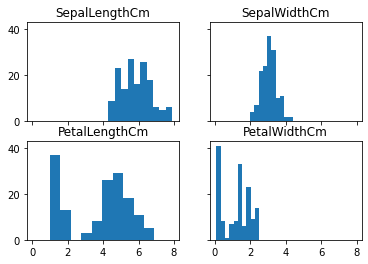

In [6]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2, sharex=True,sharey=True)
axs=[ax1,ax2,ax3,ax4]

for x,axis in enumerate(axs):
    axis.hist(irisdf.iloc[:,x])
    axis.set_title(irisdf.columns[x])

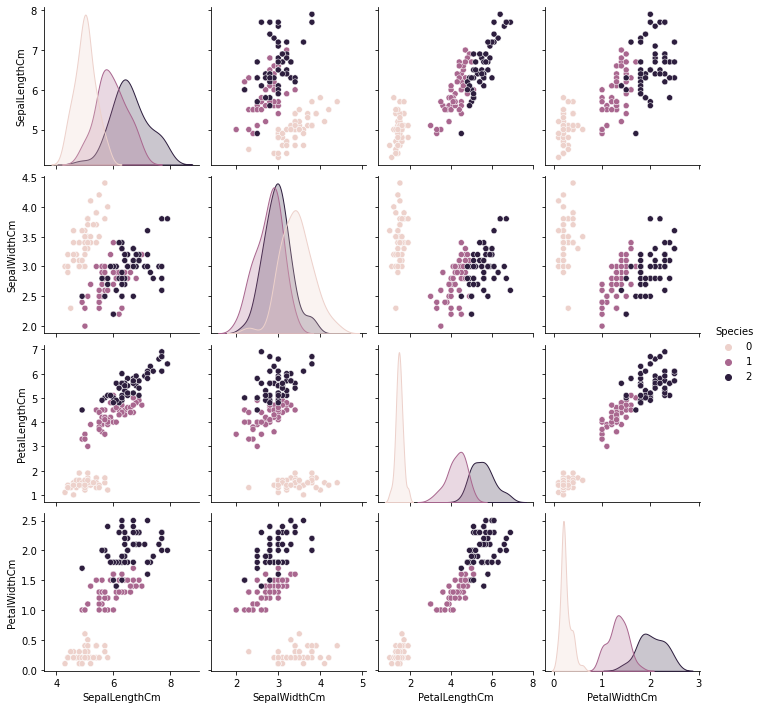

In [7]:
# plotting to see pairwise relationships between the features.
import seaborn as sns
sns.pairplot(irisdf, hue='Species');

From the above Pairplot, we notice -
1. Linear/Polynomial relationship between petal length and sepal length.
2. somewhat Linear relationship between petal length and petal width.
3. Petal length and width feature as best candidate for classification of the iris flower dataset.

In [8]:
# Saving iris Dataframe into local storage.
irisdf.to_csv('IrisData.csv')

### splitting dataset into train and test dataset.

In [21]:
X=irisdf[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=irisdf['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### K-NN model

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Fitting K-NN to the Training set.
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, p=3,metric='minkowski')
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred_knn = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
pd.DataFrame(cm)

,0,1,2
0,13,0,0
1,0,15,1
2,0,0,9


### Kernel SVM model

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#fitting kernel SVM model into training data.
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred_svm = classifier.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
pd.DataFrame(cm)

,0,1,2
0,13,0,0
1,0,15,1
2,0,0,9


### Naive Bayes model

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_naive = classifier.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_naive)
pd.DataFrame(cm)

,0,1,2
0,13,0,0
1,0,16,0
2,0,0,9


### Random Forest model

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = classifier.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
pd.DataFrame(cm)

,0,1,2
0,13,0,0
1,0,15,1
2,0,0,9


### Conclusion

We can see that all the predictor model perform samewhat same. But Naive Bayes model performs a little better on this dataset.
